<a href="https://colab.research.google.com/github/corrosivelogic/Feel_Beatz/blob/master/Speech_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

100% 427M/428M [00:21<00:00, 21.4MB/s]
100% 428M/428M [00:21<00:00, 20.4MB/s]


In [ ]:
! unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]

['/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_rush_ps.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_bone_ps.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_road_ps.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_date_ps.wav',
 '/content/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_learn_ps.wav']

In [ ]:
labels[:5]

['ps', 'ps', 'ps', 'ps', 'ps']

In [ ]:
labels[400:405]

['fear', 'fear', 'fear', 'fear', 'fear']

In [ ]:
labels[800:805]

['sad', 'sad', 'sad', 'sad', 'sad']

In [ ]:
labels[1200:1205]

['fear', 'fear', 'fear', 'fear', 'fear']

In [ ]:
labels[1600:1605]

['angry', 'angry', 'angry', 'angry', 'angry']

In [ ]:
labels[2000:2005]

['happy', 'happy', 'happy', 'happy', 'happy']

In [ ]:
labels[2400:2405]

['ps', 'ps', 'ps', 'ps', 'ps']

In [ ]:
labels[2799]

'neutral'

In [ ]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/TESS Toronto emotional speech set dat...,ps
1,/content/TESS Toronto emotional speech set dat...,ps
2,/content/TESS Toronto emotional speech set dat...,ps
3,/content/TESS Toronto emotional speech set dat...,ps
4,/content/TESS Toronto emotional speech set dat...,ps


In [ ]:
df['label'].value_counts()

ps         400
disgust    400
fear       400
sad        400
neutral    400
angry      400
happy      400
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

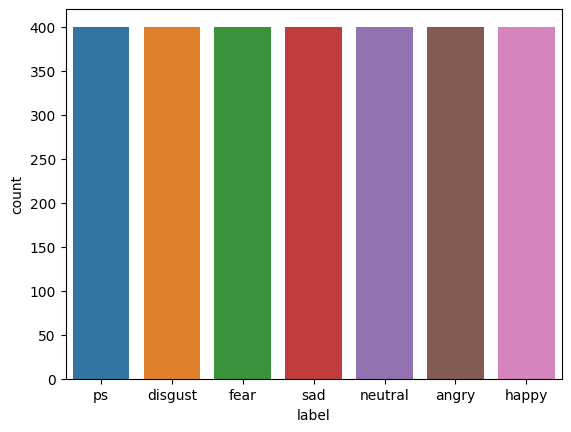

In [ ]:
sns.countplot(x=df['label'])

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

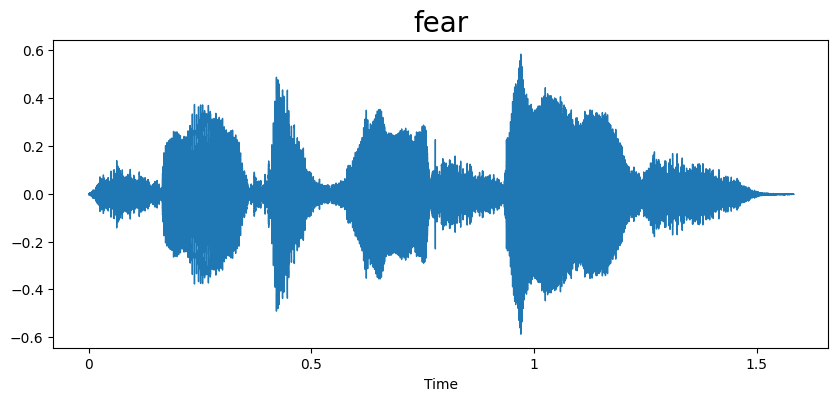

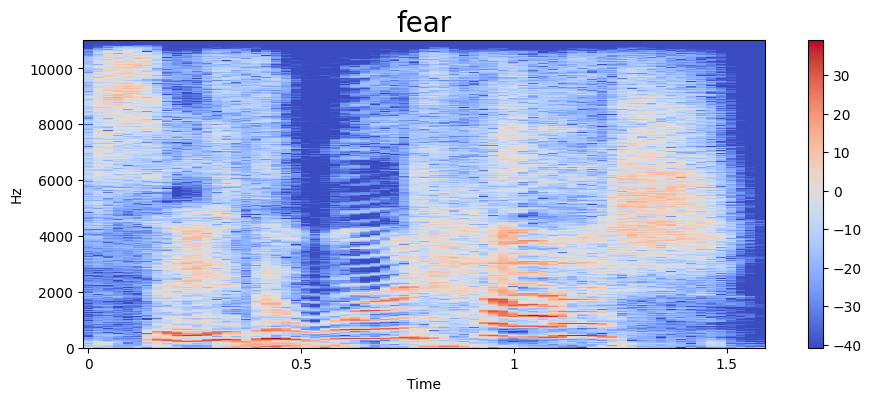

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

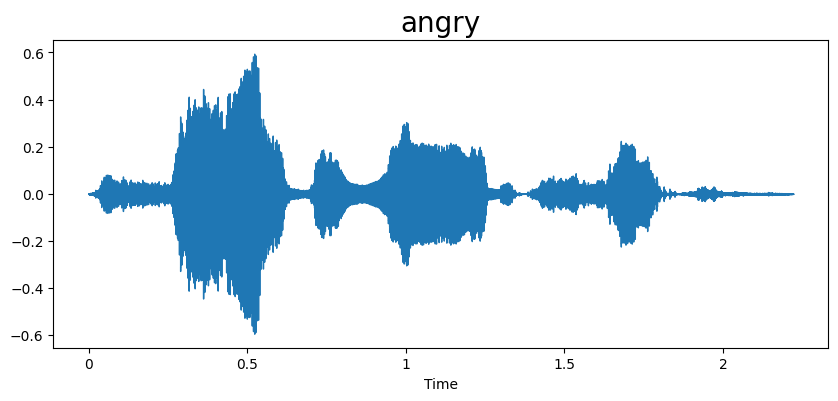

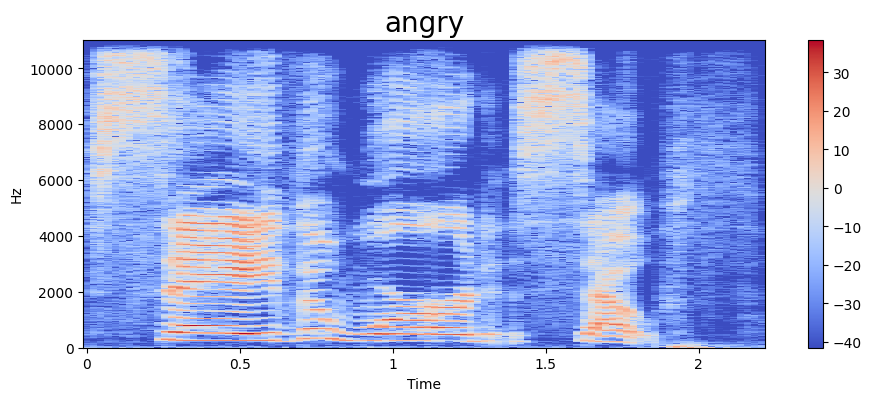

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

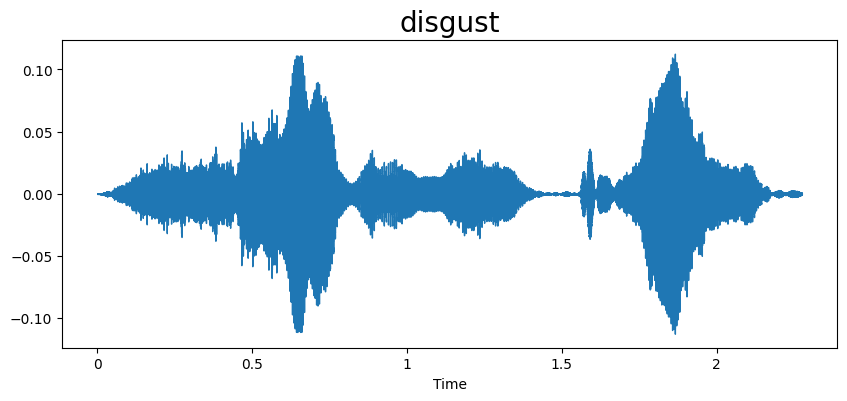

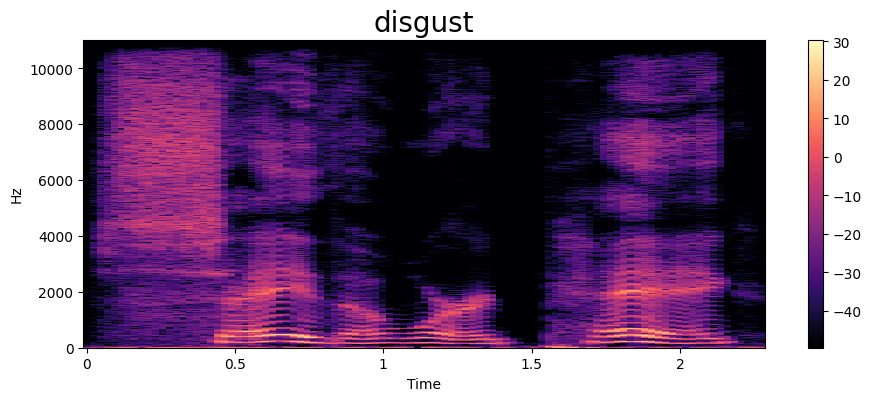

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

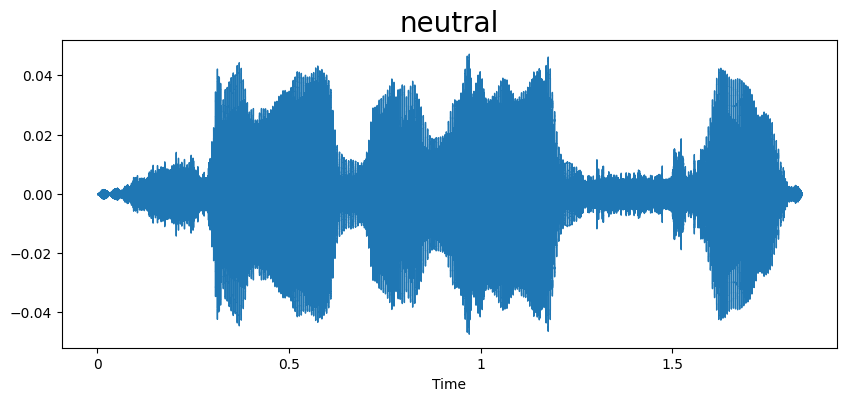

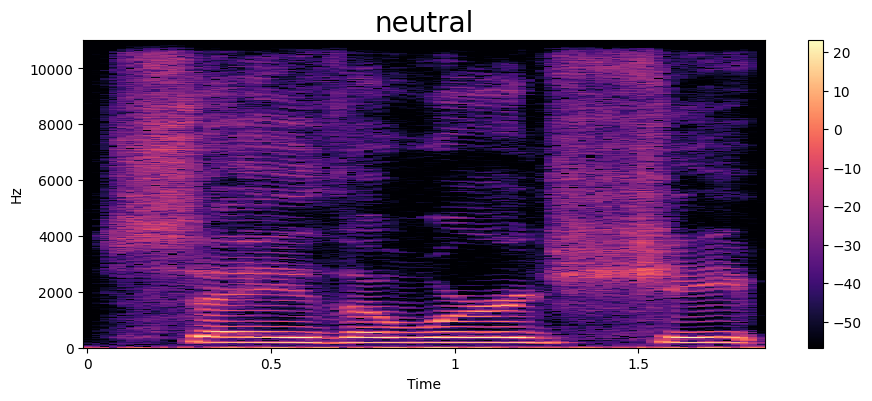

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

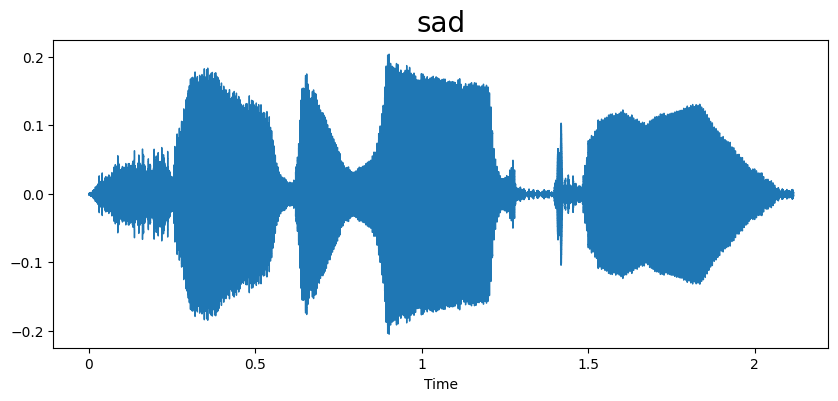

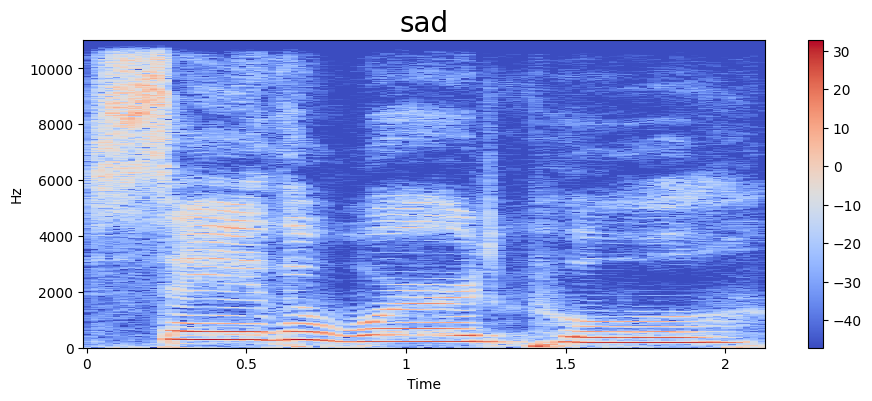

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

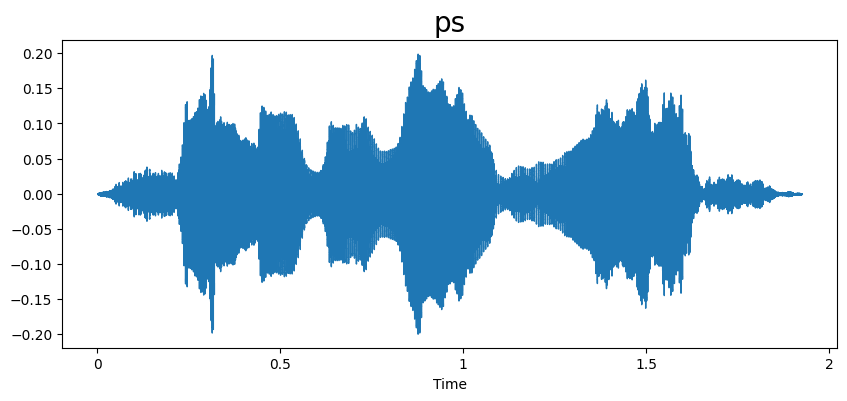

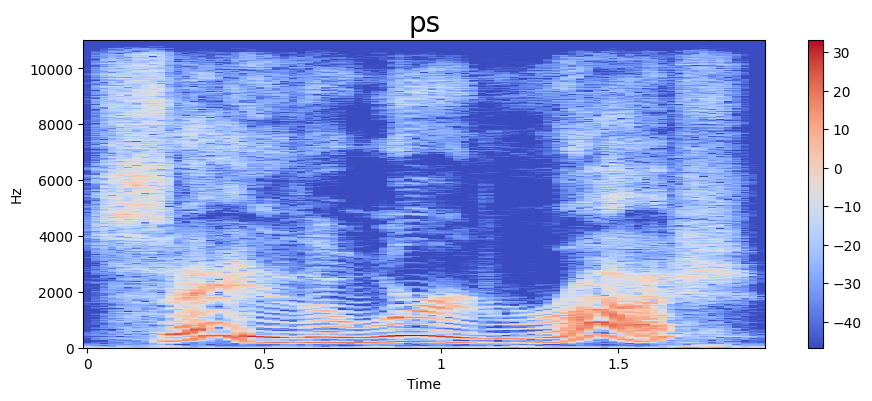

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

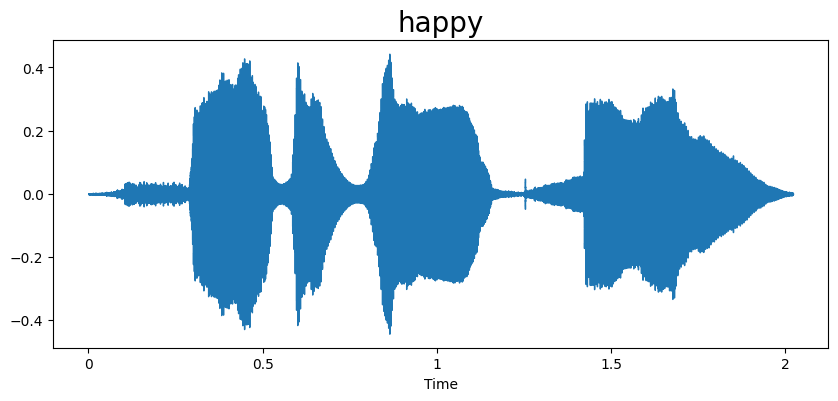

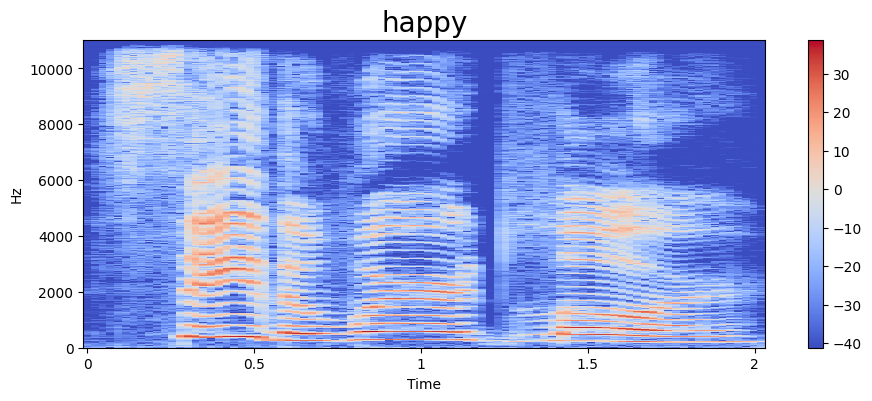

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-3.7406152e+02,  1.1278928e+02, -1.1444041e+00, -2.8645132e+01,
        4.9540901e-01,  7.1359372e-01, -5.6108055e+00, -6.8276529e+00,
       -1.1698772e+01, -6.5991468e+00, -1.3907733e+01, -5.4044051e+00,
       -1.1139237e+01,  1.0714153e+00,  5.0830609e-01,  5.7246008e+00,
        3.0422226e-02,  1.1254164e+01,  5.3676558e+00,  1.2178056e+00,
       -1.8279234e+00,  7.2392497e+00, -7.7205639e+00,  3.4176762e+00,
       -5.4288626e+00,  2.4358280e+00, -8.1980972e+00, -1.7005484e+00,
       -6.0231295e+00,  5.2883396e+00,  5.8928066e-01,  7.3069477e+00,
        5.2656093e+00,  6.7214971e+00,  9.6445627e+00,  9.8929615e+00,
        1.2742104e+01,  1.3466179e+01,  1.3620855e+01,  1.3698569e+01],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-374.06152, 112.78928, -1.144404, -28.645132,...
1       [-486.5815, 114.397285, 39.336796, 1.5482986, ...
2       [-423.4499, 133.49847, 26.54827, -29.426498, -...
3       [-455.1277, 94.63888, 18.632357, 7.485043, 25....
4       [-399.9634, 115.27032, 10.253236, -27.696835, ...
                              ...                        
2795    [-388.27567, 84.57398, -12.094965, 21.364788, ...
2796    [-395.9082, 78.127014, -5.010908, 29.610508, 1...
2797    [-455.54843, 94.78655, 5.982284, 20.885273, -5...
2798    [-386.5546, 39.01076, 4.291515, 31.505287, 0.9...
2799    [-434.71924, 77.74871, -0.43753636, 25.691572,...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
print(y.shape)

(2800, 7)


In [ ]:
y = y.toarray()

In [ ]:
y[2799]

array([0., 0., 0., 0., 1., 0., 0.])

In [ ]:
np.sum(y,axis=0)

array([400., 400., 400., 400., 400., 400., 400.])

In [ ]:
y.shape

(2800, 7)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 9s 23ms/step - loss: 1.1956 - accuracy: 0.5339 - val_loss: 2.0019 - val_accuracy: 0.2196
Epoch 2/50
35/35 [==============================] - 0s 9ms/step - loss: 0.4122 - accuracy: 0.8536 - val_loss: 2.0027 - val_accuracy: 0.5982
Epoch 3/50
35/35 [==============================] - 0s 11ms/step - loss: 0.2504 - accuracy: 0.9219 - val_loss: 1.6124 - val_accuracy: 0.5804
Epoch 4/50
35/35 [==============================] - 0s 10ms/step - loss: 0.2024 - accuracy: 0.9366 - val_loss: 2.0551 - val_accuracy: 0.5911
Epoch 5/50
35/35 [==============================] - 0s 10ms/step - loss: 0.1580 - accuracy: 0.9522 - val_loss: 1.0353 - val_accuracy: 0.7250
Epoch 6/50
35/35 [==============================] - 0s 9ms/step - loss: 0.1070 - accuracy: 0.9688 - val_loss: 1.6986 - val_accuracy: 0.6286
Epoch 7/50
35/35 [==============================] - 0s 10ms/step - loss: 0.0979 - accuracy: 0.9688 - val_loss: 1.6793 - val_accuracy: 0.7179
Epoch 8/50
35/3

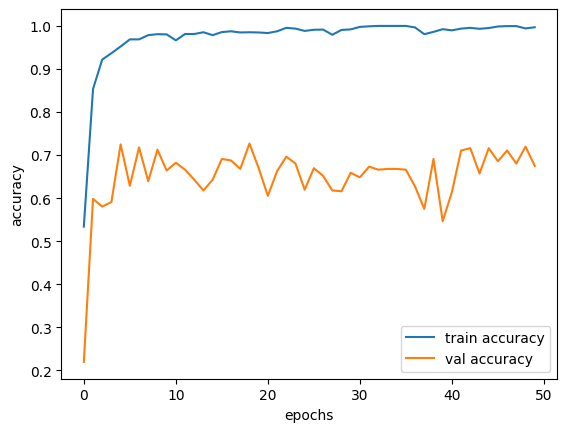

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

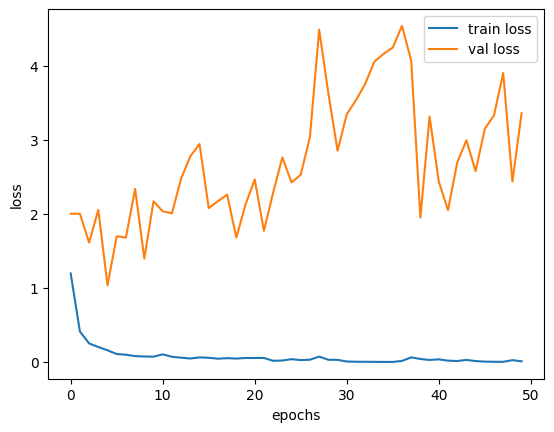

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
from joblib import Parallel, delayed
import joblib

In [ ]:
joblib.dump(model, 'speech_emote.pkl')

['speech_emote.pkl']

In [ ]:
from keras.models import load_model

In [ ]:
model.save('speech_emote.h5')